### Homework 4

### Pratik Anand (pratik@vt.edu) , Harsh Chaturvedi (charsh7@vt.edu)

In [45]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [46]:
# reading in the CSV data
data = pd.read_csv('cereal.txt', delim_whitespace = True, nrows=22)
data.head(25)

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Shelf,Potass,Vitamins
0,110,2,2,180,1.5,10.5,10,1,70,25
1,130,3,2,210,2.0,18.0,8,3,100,25
2,110,6,2,290,2.0,17.0,1,1,105,25
3,120,1,3,210,0.0,13.0,9,2,45,25
4,110,3,2,140,2.0,13.0,7,3,105,25
5,110,1,1,180,0.0,12.0,13,2,55,25
6,110,1,1,180,0.0,12.0,13,2,65,25
7,100,2,1,140,2.0,11.0,10,3,120,25
8,110,1,1,280,0.0,15.0,9,2,45,25
9,110,3,1,250,1.5,11.5,10,1,90,25


In [2]:
from sklearn.manifold import MDS
mds = MDS()

In [3]:
transformed = mds.fit_transform(data)
transformed

array([[ -16.76245706,  -19.72838612],
       [  15.37999104,    9.45747745],
       [  22.00712196,   90.66585294],
       [ -37.94911534,   13.7422344 ],
       [  10.78296392,  -63.71629846],
       [ -31.02346365,  -18.98037196],
       [ -21.79807425,  -19.44322913],
       [  24.89054865,  -67.64818892],
       [ -33.52594332,   83.82218608],
       [   5.93214804,   50.18661275],
       [ -39.37465948,   64.92688531],
       [ -30.86430523,  -18.67619378],
       [   3.3179459 ,   20.74204851],
       [  31.1909358 ,  -36.43368094],
       [  43.31605917,  -71.63819588],
       [ -87.24960205,    4.6790745 ],
       [ 161.19069152,  -25.24730656],
       [  66.80628916,   12.93810026],
       [ -21.96383383,   52.63091606],
       [ -62.21893408,  -59.22157605],
       [  22.34557113,   -4.63369641],
       [ -24.42987801,    1.57573597]])

## MDS of the cereal data

<IPython.core.display.Javascript object>


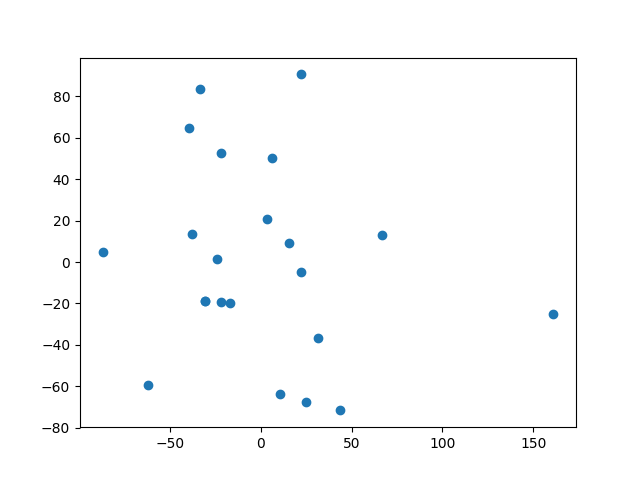

In [4]:
fig,ax = plt.subplots()
ax.scatter(transformed[:, 0], transformed[:, 1])
fig.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [6]:
transformed_pca = pca.fit_transform(data)
transformed_pca

array([[  -1.91211537,  -27.28469186],
       [   4.94273219,   15.08569628],
       [ -39.14740249,   81.03216973],
       [ -38.6241775 ,  -15.8587858 ],
       [  48.80184737,  -40.27443371],
       [ -13.66050408,  -35.53257661],
       [  -5.82023734,  -30.09359508],
       [  60.14154474,  -33.06621583],
       [ -80.14422657,   39.8766267 ],
       [ -27.17549001,   40.06618385],
       [ -72.67672998,   21.47870993],
       [ -13.68051064,  -35.48126723],
       [ -10.37130582,   15.3845488 ],
       [  44.16638144,   -6.51433267],
       [  75.79927074,  -22.11376256],
       [ -26.74365903,  -13.54737359],
       [ 134.14090451,   86.19551887],
       [  31.70627518,   26.36503278],
       [ -51.14236104,   24.29472455],
       [ -13.84836471,  -84.01869644],
       [  16.89687598,   10.34913148],
       [ -21.64874756,  -16.34261161]])

## 2-D PCA

<IPython.core.display.Javascript object>


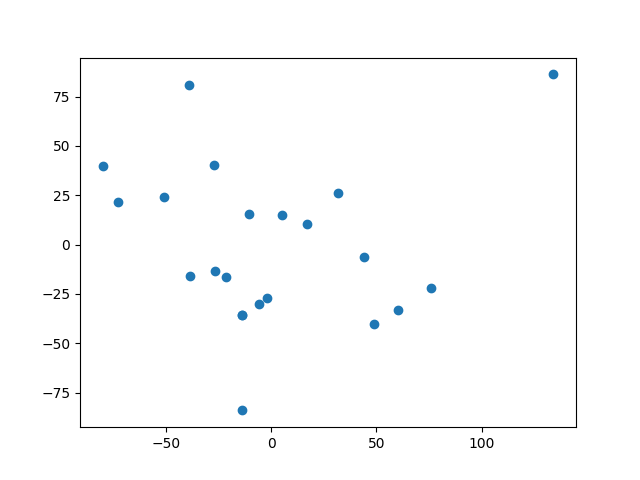

In [8]:
fig,ax = plt.subplots()
ax.scatter(transformed_pca[:, 0], transformed_pca[:, 1])
fig.show()

### Relative distances between points in MDS projection

In [42]:
from sklearn.metrics.pairwise import euclidean_distances
from itertools import product as carpro

dists = euclidean_distances(transformed).flatten()

dist_pairs = np.array(list(carpro(dists, dists)))
dist_fracs_mds = dist_pairs[:, 0] / dist_pairs[:, 1]
print('Sample of relative MDS distances (from positions 8000 to 8050):')
print(dist_fracs_mds[8000:8051])

Sample of relative MDS distances (from positions 8000 to 8050):
[  1.95332284   2.91718982   0.92647727   1.73426139   2.4775623
   3.47360977   3.23520561   8.37847758   3.94080153  10.77866091
   2.45983418   4.25354843   2.09981986   3.39062731   3.7570015
   1.95679884   2.43715465   6.02288172   2.8977329    3.41234156
          inf   2.79900216   1.76858066   1.93560361   1.0827309
   2.78332592   4.3749724    1.72202929   5.61332241   5.27933187
   3.5060886    3.66799073   1.39713923   2.08407538   5.22553512
   2.75532745   3.19947076   5.59096544   1.30370085   1.97321033
   1.44155143   2.75832447   2.79900216          inf   4.78160659
   1.42007079   1.36448876   2.92455769   1.71652462   1.8516897
   5.39392501]


C:\Users\braq\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\braq\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


### Relative distances between points in PCA projection

In [43]:
dists = euclidean_distances(transformed_pca).flatten()

dist_pairs = np.array(list(carpro(dists, dists)))
dist_fracs_pca = dist_pairs[:, 0] / dist_pairs[:, 1]
print('Sample of relative PCA distances (from positions 8000 to 8050):')
print(dist_fracs_pca[8000:8051])

Sample of relative PCA distances (from positions 8000 to 8050):
[  1.95823683   6.93977491   0.92535444   2.30947153   2.51141502
   3.65009121   3.21569592   8.5459335    4.0728371   11.56673224
   2.47172311   4.20591899   2.180878     3.47228152   3.87629292
   2.07081465   2.39587399   5.9334446    2.83002096   3.4756812
          inf   3.01458078   1.88523743   5.32942449   1.10090591
   4.07405176   4.24521927   1.78121766   6.38918649   5.26157932
   3.50524676   3.95657899   1.46596543   2.12644147   5.1990452
   2.73831308   3.20555185   5.71742329   1.33524821   2.07937351
   1.47455442   2.73852928   3.01458078          inf   5.02314892
   2.48627791   1.37134903   5.03871662   1.76875901   1.8300046
   5.52568381]


C:\Users\braq\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\braq\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


### Relative distances - MDS vs PCA

In the samples displayed above, the relative distances (RDs) obtained from MDS and PCA appear identical. In order to verify this thoroughly for all points, we compute the relative differences between corresponding RDs from the different algorithms and find their mean. This turns out to be **exactly 0** (see output below), implying that **the two relative distance arrays are identical**.

In [48]:
dists_mean = np.mean(np.array([dist_fracs_mds, dist_fracs_mds]), axis = 0)
dists_diff = np.abs(dist_fracs_mds - dist_fracs_mds)
fracs_mean = np.nanmean(dists_diff / dists_mean)

print('Mean relative difference between relative-distance arrays from MDS and PCA =', 
      fracs_mean)

Mean relative difference between relative-distance arrays from MDS and PCA = 0.0


C:\Users\braq\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
C:\Users\braq\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### Conclusion

Although the reduced component values and pairwise distances for the points obtained are very different for MDS and PCA, the relative distances between the points are identical. This means that the two methods **preserve the structure of the data** when projecting it onto a lower dimensional space in an identical fashion.